Bagging Classifier

Bagging (or Bootstrap aggregating) is a type of ensemble learning in which multiple base models are trained independently and in parallel on different subsets of the training data. Each subset is generated using bootstrap sampling, in which data points are picked at random with replacement. In the case of the bagging classifier, the final prediction is made by aggregating the predictions of the all-base model using majority voting. In the models of regression, the final prediction is made by averaging the predictions of the all-base model, and that is known as bagging regression.

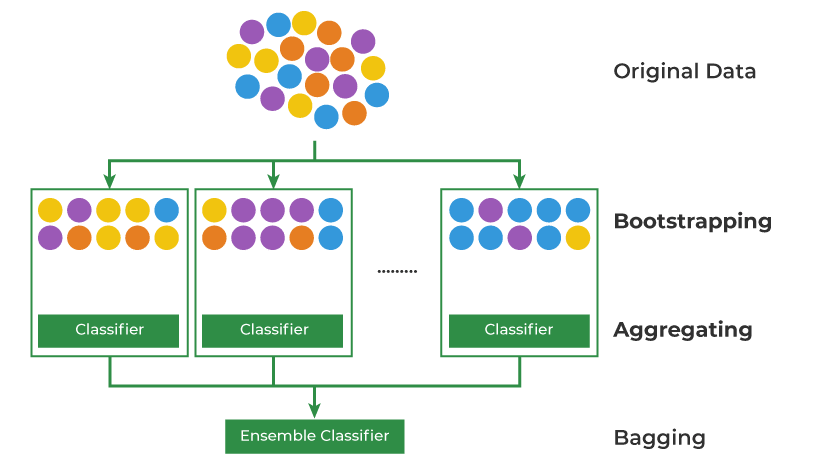

How does Bagging Classifier Work?

The basic steps of how a bagging classifier works are as follows:

Bootstrap Sampling: In Bootstrap Sampling randomly ‘n’ subsets of original training data are sampled with replacement. This step ensures that the base models are trained on diverse subsets of the data, as some samples may appear multiple times in the new subset, while others may be omitted. It reduces the risks of overfitting and improves the accuracy of the model.

Let's break it down step by step:
Original training dataset: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
Resampled training set 1: [2, 3, 3, 5, 6, 1, 8, 10, 9, 1]
    
Resampled training set 2: [1, 1, 5, 6, 3, 8, 9, 10, 2, 7] 
    
Resampled training set 3: [1, 5, 8, 9, 2, 10, 9, 7, 5, 4]
    
Base Model Training: 

In bagging, multiple base models are used. After the Bootstrap Sampling, each base model is independently trained using a specific learning algorithm, such as decision trees, support vector machines, or neural networks on a different bootstrapped subset of data. These models are typically called “Weak learners” because they may not be highly accurate on their own. Since the base model is trained independently of different subsets of data. To make the model computationally efficient and less time-consuming, the base models can be trained in parallel.

Aggregation: Once all the base models are trained, it is used to make predictions on the unseen data i.e. the subset of data on which that base model is not trained. In the bagging classifier, the predicted class label for the given instance is chosen based on the majority voting. The class which has the majority voting is the prediction of the model.

Out-of-Bag (OOB) Evaluation: Some samples are excluded from the training subset of particular base models during the bootstrapping method. These “out-of-bag” samples can be used to estimate the model’s performance without the need for cross-validation.

Final Prediction: After aggregating the predictions from all the base models, Bagging produces a final prediction for each instance.

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [4]:
from sklearn.ensemble import BaggingClassifier

# Load the dataset
#digit = load_digits()

digit = pd.read_csv('Datasets\iris.csv')

#X, y = digit.data, digit.target

X = digit.values[:, 0:4]
y = digit.values[:, 4]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the base classifier
base_classifier = DecisionTreeClassifier()

# Number of base models (iterations)
n_estimators = 10

# Create the Bagging classifier
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=n_estimators)



# Train the Bagging classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets\\iris.csv'